### hierarchical 계층적 군집분석 

- from scipy.cluster.hierarchy import dendrogram, linkage

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
X = np.array([[5, 3], [10, 30], [15, 12], [24, 10], [10, 15], [85, 70], [60, 78], [70, 55], [80, 91], [90, 35]])
X

array([[ 5,  3],
       [10, 30],
       [15, 12],
       [24, 10],
       [10, 15],
       [85, 70],
       [60, 78],
       [70, 55],
       [80, 91],
       [90, 35]])

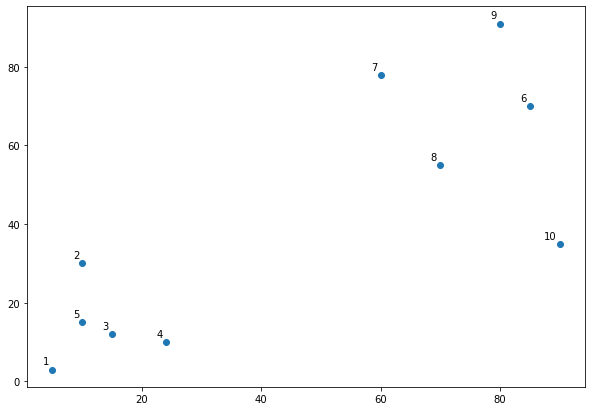

In [19]:
labels = range(1, 11)
plt.figure(figsize = (10, 7))

plt.scatter(X[:,0], X[:,1])

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,
                xy = (x, y), xytext = (-3, 3), textcoords = 'offset points', ha = 'right', va = 'bottom')
plt. show()

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single') # single : 가장 최소 거리

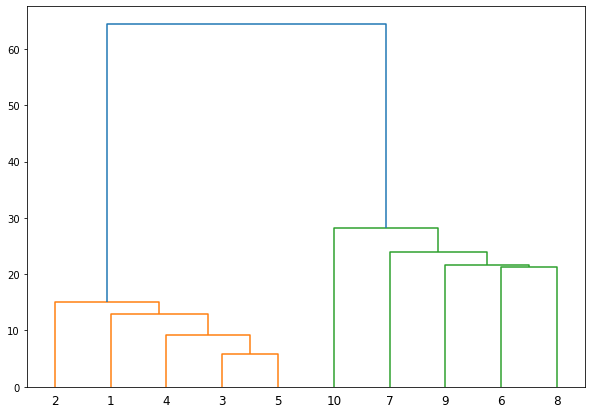

In [7]:
labelList = range(1, 11)

plt.figure(figsize = (10, 7))
dendrogram(linked, labels = labelList)
plt.show()

- #### iris 분류

- from sklearn.cluster import AgglomerativeClustering

In [8]:
from sklearn import datasets

In [22]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
feature = pd.DataFrame(iris.data, columns = ["sepal length", "sepal width", "petal length", "petal width"])
feature.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


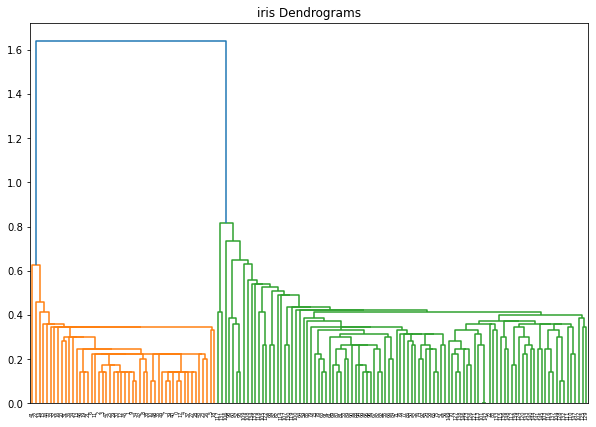

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))
plt.title("iris Dendrograms")
dend = shc.dendrogram(shc.linkage(feature))

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
cluster = AgglomerativeClustering(n_clusters = 3)
cluster.fit_predict(feature)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [16]:
label = pd.DataFrame(cluster.labels_)
label.columns = ['label']

In [17]:
iris_pred = feature.join(label)
iris_pred

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


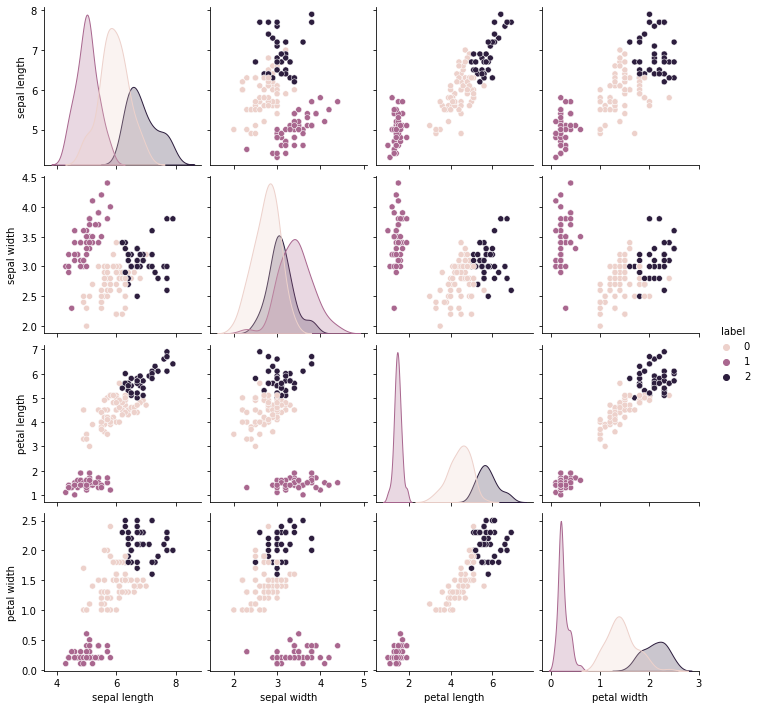

In [18]:
import seaborn as sns

sns.pairplot(iris_pred, hue = 'label')
plt.show()